In [ ]:
import math
import os
import time
import numpy as np
import pandas as pd
from nmf_methods.nmf_son.new import new as nmf_son_new
from nmf_methods.nmf_son.utils import save_results
import csv

np.random.seed(42)
np.set_printoptions(precision=3)

In [ ]:
RUN = False

EARLY_STOP = True
VERBOSE = False
SCALE_REG = True

In [ ]:
max_iters = 10000

In [ ]:
results_csv_fp = '../../experimental/saved_models/multi_size/output.csv'
fieldnames = ['n', 'rank', 'lambda', 'time_taken', 'fscore', 'gscore', 'scaled_lambda']
# with open(results_csv_fp, mode='w') as csv_file:
#     writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
#     writer.writeheader()

In [ ]:
jasper_full = np.load('../../experimental/datasets/jasper_full.npz')['X']
jasper_3d = jasper_full.reshape(-1, 100, 100, order='F')
m, _ = jasper_full.shape

In [ ]:
ini_filepath = '../../experimental/saved_models/multi_size/r{}_ini.npz'
save_filepath = '../../experimental/saved_models/multi_size/r{}_l{}_mit{}.npz'
lambda_vals = [0.0001, 0.01, 0.1, 1, 10, 100, 1000]

In [ ]:
from nmf_methods.nmf_son.utils import plot_scores, load_results, plot_and_merge

m, _ = jasper_full.shape
dims = [3, 5, 7, 10, 12, 15]
for dim in dims:
    M_3d = jasper_3d[:, :dim, :dim]
    M = M_3d.reshape(m, -1, order='F')
    m, n = M.shape
    r = n
    if os.path.exists(ini_filepath.format(r)):
        data = np.load(ini_filepath.format(r))
        ini_W = data['ini_W']
        ini_H = data['ini_H']
    else:
        ini_W = np.random.rand(m, r)
        ini_H = np.random.rand(r, n)
        with open(ini_filepath.format(r), 'wb') as fout:
            np.savez_compressed(fout, ini_W=ini_W, ini_H=ini_H)

    for _lam in lambda_vals:
        if RUN:
            start_time = time.time()
            W, H, fscores, gscores, lvals = nmf_son_new(M, ini_W.copy(), ini_H.copy(), lam=_lam, itermax=max_iters, early_stop=EARLY_STOP, verbose=VERBOSE, scale_reg=SCALE_REG)
            time_taken = time.time() - start_time
            save_results(save_filepath.format(r, _lam, max_iters), W, H, fscores, gscores, lvals)
            with open(results_csv_fp, 'a') as csv_file:
                writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
                writer.writerow({'n': n,
                                 'rank': r,
                                 'lambda': _lam,
                                 'time_taken': time_taken,
                                 'fscore': fscores[-1],
                                 'gscore': gscores[-1],
                                 'scaled_lambda': lvals[-2]})
        else:
            W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters))
            plot_scores(fscores, gscores, lvals, plot_title=_lam)

            img_filenames = ['../../experimental/images/multi_size/w_tmp.png', '../../experimental/images/multi_size/seph_tmp.png', '../../experimental/images/multi_size/combh_tmp.png'
                , f'../../experimental/images/multi_size/d{dim}_r{r}_l{_lam}_mit{max_iters}.png']
            plot_and_merge(W, H, imgsize=(dim, dim), figsize=(32,32), fontsize=15, filenames=img_filenames, num_rows=dim, delete=True)
        print(r, _lam)


In [4]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
results_csv_fp = '../../experimental/saved_models/multi_size/output.csv'
df = pd.read_csv(results_csv_fp)

In [6]:
jasper_full = np.load('../../experimental/datasets/jasper_full.npz')['X']
jasper_3d = jasper_full.reshape(-1, 100, 100, order='F')
m, _ = jasper_full.shape

In [7]:
df.drop(df[df['rank'] == 400].index, inplace=True)
df

,n,rank,lambda,time_taken,fscore,gscore,scaled_lambda
0,9,9,0.001,29.602165,1.676135e+03,4.259514e+05,3.935390e-06
1,9,9,0.010,28.892405,4.918382e+03,1.141080e+08,4.310667e-07
2,9,9,1.000,28.904813,2.367916e+04,3.123234e+08,7.581864e-05
3,9,9,100.000,28.894315,2.366216e+09,2.281986e+04,1.036911e+07
4,9,9,10000.000,28.046052,2.366216e+09,2.281986e+04,1.036911e+09
5,25,25,0.001,200.782219,5.957079e+05,1.045360e+09,5.698911e-07
6,25,25,0.010,200.234772,1.070973e+06,8.325693e+09,1.286362e-06
7,25,25,1.000,201.275096,9.578042e+05,3.728057e+09,2.569240e-04
8,25,25,100.000,200.246270,8.230147e+09,2.539692e+04,3.240608e+07
9,25,25,10000.000,200.558192,8.230147e+09,2.539692e+04,3.240608e+09


In [8]:
df['F_k'] = (1/(m*df['n'])) * df['fscore'] + (2/(df['rank'].apply(lambda x: math.comb(x, 2)) - df['rank'])) * df['gscore'] * df['scaled_lambda']

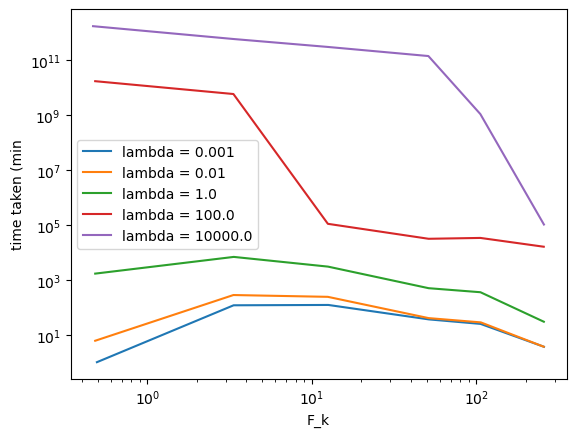

In [18]:
fig, ax = plt.subplots()

# Iterate over unique values of lambda and plot data for each
for lam in df['lambda'].unique():
    data = df.loc[df['lambda'] == lam]
    ax.plot(data['time_taken'] / 60, data['F_k'], label=f"lambda = {lam}")
# Add axis labels and legend
ax.set_xlabel('F_k')
ax.set_ylabel('time taken (min')
ax.legend()

# Set log scale for x-axis
ax.set_xscale('log')
ax.set_yscale('log')

# Show the plot
plt.savefig('../../experimental/images/multi_size/tk_Fk.png')


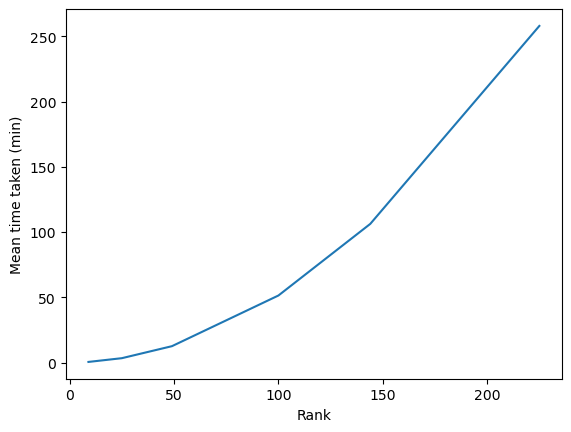

<Figure size 640x480 with 0 Axes>

In [16]:
mean_time_taken = df['time_taken'].groupby(df['rank']).mean()

# Plot mean time_taken with log scale
fig, ax = plt.subplots()
ax.plot(mean_time_taken.index, mean_time_taken.values / 60)
# ax.set_yscale('log')
ax.set_xlabel('Rank')
ax.set_ylabel('Mean time taken (min)')
plt.show()
plt.savefig('../../experimental/images/multi_size/rank_time.png')


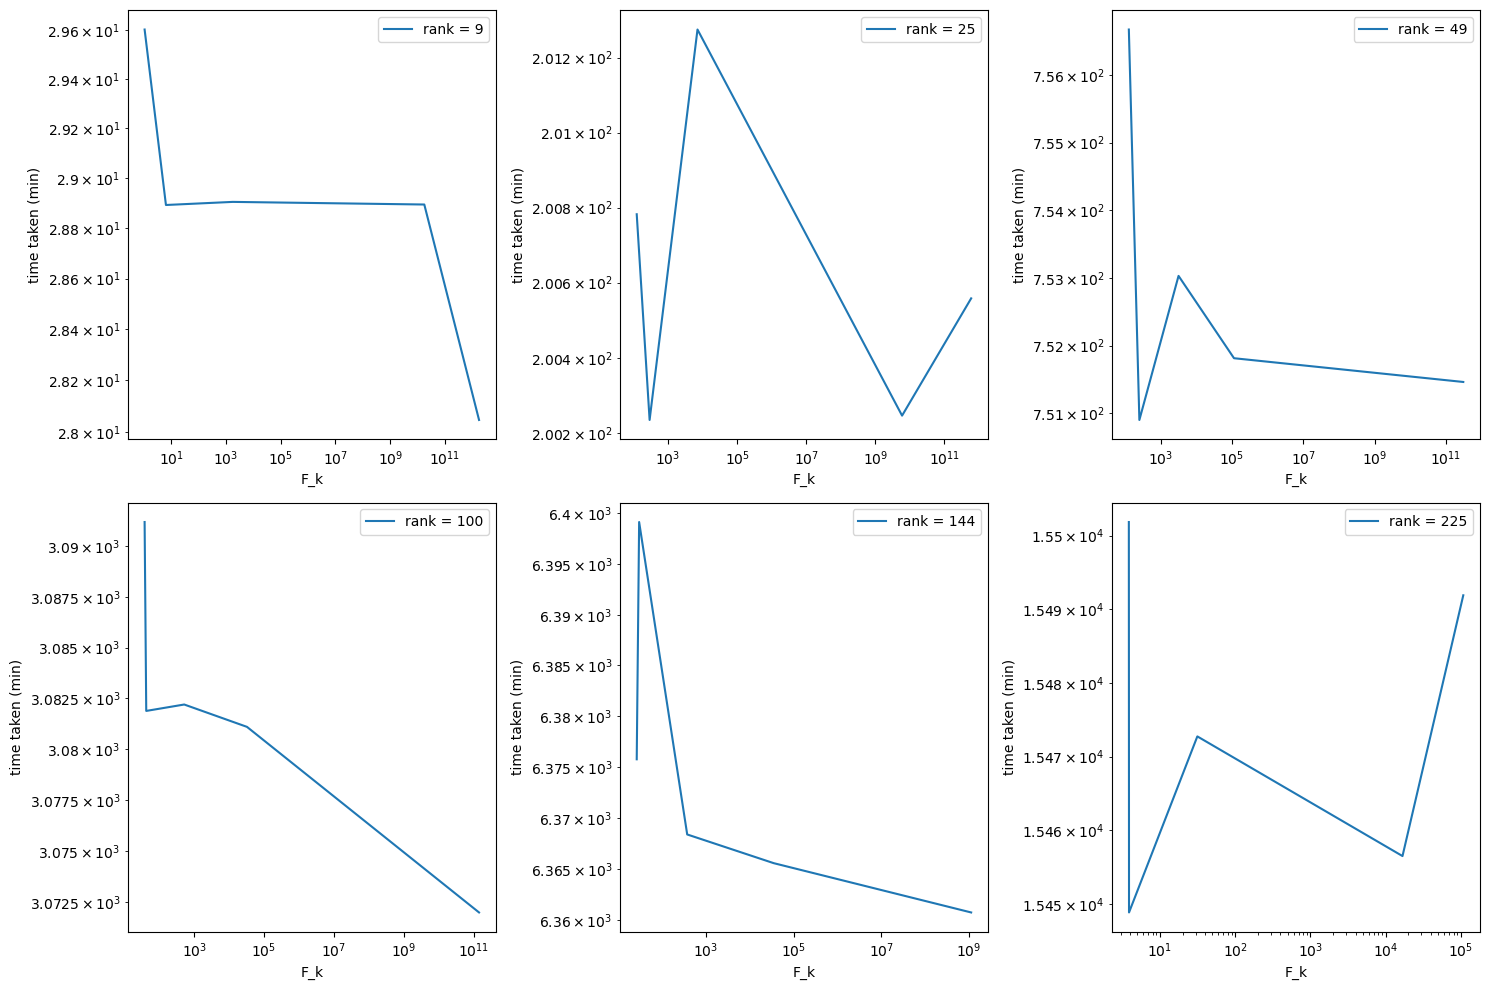

<Figure size 640x480 with 0 Axes>

In [17]:
rank_values = df['rank'].unique()
num_cols = 3
num_rows = len(rank_values) // num_cols + (len(rank_values) % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.ravel()

# Iterate over unique values of rank and plot data for each
for i, rank in enumerate(rank_values):
    data = df.loc[df['rank'] == rank]
    ax = axes[i]
    ax.plot(data['F_k'], data['time_taken'], label=f"rank = {rank}")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('F_k')
    ax.set_ylabel('time taken (min)')
    ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('../../experimental/images/multi_size/rank_split.png')
